# MLP - Multilayer perceptron

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
class mlp:
    '''Wielowarstwowy perceptron (1 warstwa ukryta)'''
    def __init__(self, n_in, n_out, n_hid):
        
        # liczba neuronów w kolejnych warstwach
        self.n_in=n_in
        self.n_hid=n_hid
        self.n_out=n_out

        # stany neuronów
        self.S_in=zeros(n_in+1)
        self.S_hid=zeros(n_hid)
        self.S_out=zeros(n_out)
        self.S_in[-1]=1

        # pola lokalne
        self.h_hid=zeros(n_hid)
        self.h_out=zeros(n_out)

        # wagi połączeń
        self.W_ih=zeros((n_in+1,n_hid))
        self.W_ho=zeros((n_hid,n_out))

        # delty
        self.dW_ih=zeros((n_in+1,n_hid))
        self.dW_ho=zeros((n_hid,n_out))
        
        self.reset()
    
    def reset(self):
        self.W_ih = normal(0,1/sqrt(self.n_hid), self.W_ih.shape)
        self.W_ho = normal(0,1/sqrt(self.n_out), self.W_ho.shape)
        
        
    def f(self, x):
        '''Funkcja aktywacji'''
#         return 1/(1+exp(-x))
#         return (tanh(x/2)+1)/2
        return maximum(x,0) # ReLU - rectified linear unit

    def Df(self, x):
        '''Pochodna funkcji aktywacji'''
#         y=self.f(x)
#         return y*(1-y)
#         return cosh(x)**-1/4
        return heaviside(x,0)

    def feed(self, inp):
        '''Przekazuje wektor danych do warstwy wejściowej'''
        self.S_in[:self.n_in]=inp

    def forward(self):
        '''Propaguje sygnał poprzez kolejne warstwy sieci'''
        self.h_hid = self.S_in @ self.W_ih
        self.S_hid = self.f(self.h_hid)
        self.h_out = self.S_hid @ self.W_ho
        self.S_out = self.f(self.h_out)
        
    def diff(self, p):
        return self.trainData[p,self.n_in:] - self.S_out

    def error(self,p):
        return sum(self.diff(p)**2)/2
    
    def setTrainData(self,data):
        '''Zapamiętuje referencję do wektorów uczących'''
        self.trainData=data

    def eval(self,inp):
        self.feed(inp)
        self.forward()
        return self.S_out


    def train(self, eta):
        '''Jedna epoka.'''
    
        Er=0
        p_num=self.trainData.shape[0]

        self.dW_ih.fill(0)
        self.dW_ho.fill(0)

        for p in range(p_num):
            self.feed(self.trainData[p,:self.n_in])
            self.forward()
        
            self.delta_out = self.Df(self.h_out)*self.diff(p)
            self.dW_ho += outer(self.S_hid, self.delta_out)
            self.delta_hid = self.Df(self.h_hid)*(self.W_ho @ self.delta_out)
            self.dW_ih += outer(self.S_in, self.delta_hid)

            Er+=self.error(p)

        self.W_ih+=eta*self.dW_ih
        self.W_ho+=eta*self.dW_ho
        return Er   

In [3]:
pat=array([
    [0,0,0,0,1,1,1,1,1,1,0], #0
    [0,0,0,1,0,1,1,0,0,0,0], #1
    [0,0,1,0,1,1,0,1,1,0,1], #2
    [0,0,1,1,1,1,1,1,0,0,1], #3
    [0,1,0,0,0,1,1,0,0,1,1], #4
    [0,1,0,1,1,0,1,1,0,1,1], #5
    [0,1,1,0,1,0,1,1,1,1,1], #6
    [0,1,1,1,1,1,1,0,0,0,0], #7
    [1,0,0,0,1,1,1,1,1,1,1], #8
    [1,0,0,1,1,1,1,1,0,1,1], #9
    [1,0,1,0,1,1,1,0,1,1,1], #A
    [1,0,1,1,0,0,1,1,1,1,1], #B
    [1,1,0,0,1,0,0,1,1,1,0], #C
    [1,1,0,1,0,1,1,1,1,0,1], #D
    [1,1,1,0,1,0,0,1,1,1,1], #E
    [1,1,1,1,1,0,0,0,1,1,1]  #F
])

In [4]:
m=mlp(4,7,31)
m.setTrainData(pat)

In [10]:
m.reset()
hist=[]

In [11]:
eta=0.01
for epoch in range(2000):
    hist.append(m.train(eta))
print(hist[-1])

# 1 błędny segment dodaje 0.5 do błędu

0.007893597849288763


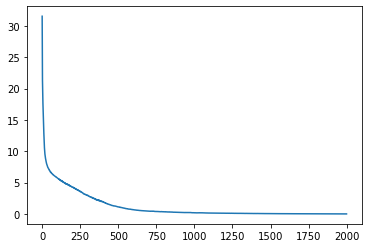

In [12]:
plot(hist)

In [8]:
def lcd(segments):
    pixels=[[1,2], [7,11], [19,23], [25,26],
              [16,20], [4,8], [13,14]]
    d=zeros(4*7)
    for s in range(7):
        if segments[s]:
            d[pixels[s]]=1
    imshow(d.reshape(7,4));

ints=[[0,0,0,0], [0,0,0,1], [0,0,1,0], [0,0,1,1], 
 [0,1,0,0], [0,1,0,1], [0,1,1,0], [0,1,1,1], 
 [1,0,0,0], [1,0,0,1], [1,0,1,0], [1,0,1,1], 
 [1,1,0,0], [1,1,0,1], [1,1,1,0], [1,1,1,1]]

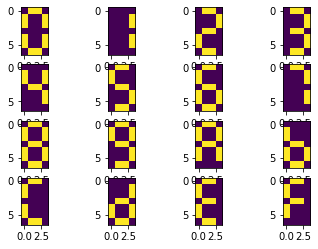

In [13]:
subplots(4,4)
plt=1
for i in ints:
    subplot(4,4,plt)
    lcd(m.eval(i)>0.5)
    plt+=1